# Is Alexander Ovechkin the NHL's best goal-scorer?

## Since his arrival to the NHL in the 2005-2006 season, Ovechkin has been one of the NHL's marquee players. Largely known for his ability to score goals and for having a vibrant personality contrary to most players in the league, Ovechkin has also been one of the league's most discussed players. One of those discussions is if he is truly the best goal-scorer in the league. This notebook seeks to resolve that discussion.

To resolve it, we will be using a dataset of NHL player performance metrics dating from 1940 to 2018 to evaluate Ovechkin's goal scoring rates compared to his peers and from earlier decades. As an extension, we will also be exploring shooting percentage and shots to see further examine the source of Ovechkin's goals per game. 

This dataset is being imported from [inalitic.com](http://inalitic.com/datasets/nhl%20player%20data.html), which sourced its dataset from [Hockey-reference](http://hockey-reference.com), a repository of NHL data. We will use the information from this dataset to create a comparison of goals per game and shooting percentages of Ovechkin and other NHL players.

## Limitations
A limitation of the data is that not all statistics have been historically tracked. While data metrics such as shots have been tracked for the last few decades (and the entirety of Ovechkin's career), they were not historically tracked in the early years of the NHL. Moreover, a number of rules changed at the start of Ovechkin's career. This makes comparisons between Ovechkin and some of hockey's all-time greats more difficult to make. Instead, this will focus more on Ovechkin and his peers, particularly other star players, which are easier comparisons to make. An additional limitation is that an assumption within the data set regarding null values was made. While it is easy to infer that the intention of the null value is a 0, given the null value was a result of converting a value of ' - ' in columns that were full of numerical values and that many players do not score goals or meet other metrics, it is still an assumption that was made.

## Summary
Some of the key findings are that Ovechkin scores approximately 0.462 more goals per game than his peers and 0.439 more goals per game than the average NHL player since 1940. We also found that Ovechkin's shooting percentage is 2.544% higher than his peer forwards, but in line with other NHL superstar players, so it is reasonable. Instead, where Ovechkin far exceeds other players is in his total shots. Ovechkin is able to shoot the puck far more often than even other NHL superstars. This leads us to the conclusion that yes, Ovechkin is the NHL's best goal-scorer because he is the best at generating shots while maintaining an above average shooring percentage.


## Terminology
To familiarize yourself with some hockey statistical terms:

<b>Season</b> = NHL season in which the other statistics took place, serving as a timestamp<br>
<b>Player</b> = the name of the NHL athlete<br>
<b>Age</b> = age of a given player during that season<br>
<b>Tm</b> = NHL team / club a given player played for during that season<br>
<b>Pos</b> = position a given player plays<br>
<b>GP</b> = number of games played by a given player during that season<br>
<b>G</b> = number of goals scored by a given player during that season<br>
<b>GPG</b> = average (mean) goals per game of a given player during that season, equivalent to G/GP<br>
<b>S</b> = number of shots taken by a given player during that season<br>
<b>S%</b> = percentage of shots taken by a given player that were goals during that season, equivalent to G/S * 100<br>




<b>To start, we need to import our tools and csv file, then examine and clean the data.</b>

In [2]:
# import tools / libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [3]:
# use Chardet to check encoding of CSV file

with open('skater_stats.csv', 'rb') as fraw:
    file_content = fraw.read(-1)
chardet.detect(file_content)

{'encoding': 'Windows-1252', 'confidence': 0.7298054992764109, 'language': ''}

In [4]:
## Import csv and check headers, need to include encoding value since CSV is encoded as Windows-1252

df = pd.read_csv('skater_stats.csv', encoding = 'Windows-1252')
df.head()

C:\Users\saulc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Season,Player,Age,Tm,Pos,GP,G,GPG,A,...,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018Justin Abdelkader,2018,Justin Abdelkader,30,DET,LW,75,13,0.1733,22,...,-,110,12,"1,241",16:33,40.0,174.0,47.0,50.0,48.5
1,2018Pontus Aberg,2018,Pontus Aberg,24,TOT,LW,53,4,0.0755,12,...,-,70,6,645,12:10,8.0,24.0,4.0,8.0,33.3
2,2018Noel Acciari,2018,Noel Acciari,26,BOS,C,60,10,0.1667,1,...,-,66,15,775,12:55,41.0,152.0,42.0,51.0,45.2
3,2018Kenny Agostino,2018,Kenny Agostino,25,BOS,LW,5,-,0.0000,1,...,-,11,-,60,12:03,1.0,4.0,0.0,1.0,0.0
4,2018Sebastian Aho,2018,Sebastian Aho,20,CAR,RW,78,29,0.3718,36,...,-,200,15,"1,398",17:55,17.0,65.0,78.0,94.0,45.3


In [5]:
# check data types and null-values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37825 entries, 0 to 37824
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37825 non-null  object 
 1   Season      37825 non-null  int64  
 2   Player      37825 non-null  object 
 3   Age         37825 non-null  int64  
 4   Tm          37825 non-null  object 
 5   Pos         37825 non-null  object 
 6   GP          37825 non-null  int64  
 7   G           37825 non-null  object 
 8   GPG         37825 non-null  float64
 9   A           37825 non-null  object 
 10  PTS         37825 non-null  object 
 11  +/-         33913 non-null  object 
 12  PIM         37824 non-null  object 
 13  EVG         34537 non-null  object 
 14  PPG         34537 non-null  object 
 15  SHG         34537 non-null  object 
 16  GWG         34537 non-null  object 
 17  EVA         33913 non-null  object 
 18  PPA         33913 non-null  object 
 19  SHA         33913 non-nul

Since we are analyzing shots and goals, we can remove many of the columns, as they are unnecessary in determining Ovechkin's goal-scoring ability.

In [6]:
## Remove unnecessary columns

# Since we are analyzing shots and goals, we can remove most of the columns

df.drop(['Unnamed: 0', 'BLK','A', 'PTS','+/-', 'PIM', 'EVG', 'PPG', 'SHG', 'GWG', 'EVA', 'PPA', 'SHA', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOwin', 'FOloss', 'FO%'], axis = 1, inplace = True)

# Convert most statline columns from object to int or float

df['G'] = pd.to_numeric(df['G'], errors = 'coerce')
df['S'] = pd.to_numeric(df['S'], errors = 'coerce')
df['S%'] = pd.to_numeric(df['S%'], errors = 'coerce')


Since we have removed unnecessary columns, we should also add some columns that will help us better categorize some data. Particularly, we should categorize positions between a 'forward' group and a 'defenseman' group. We should also compare Ovechkin to some of the NHL's other superstar athletes.

In [7]:
# Create a new column in the dataframe that distinguishes between forwards and defensemen
# Define an if-else function

def Position_group(row):
    if row['Pos'] == ' D ':
        return 'Defense'
    elif row['Pos'] == ' C ' or ' LW ' or ' RW ':
        return 'Forward'
    else:
        return 'Unknown'
    
# incorporate this into a new column

df['Pos Group'] = df.apply(lambda row: Position_group(row), axis = 1)


# Create a new column in the dataframe that distinguishes between Ovechkin, other NHL superstars, and other NHL players
# Define an if-else function that will identify and separate Ovechkin, other star players, and their peers 

def Identity(row):
    if row['Player'] == 'Alex Ovechkin':
        return 'Ovechkin'
    elif row['Player'] == 'Sidney Crosby':
        return 'Crosby'
    elif row['Player'] == 'Steven Stamkos':
        return 'Stamkos'
    elif row['Player'] == 'Patrick Kane':
        return 'Kane'
    elif row['Player'] == 'Connor McDavid':
        return 'McDavid'
    elif row['Player'] == 'Evgeni Malkin':
        return 'Malkin'
    else:
        return 'Others'
    
# incorporate the results of that function into a new column
    
df['Identity'] = df.apply(lambda row: Identity(row), axis = 1)

# check results

df.head(10)

,Season,Player,Age,Tm,Pos,GP,G,GPG,S,S%,Pos Group,Identity
0,2018,Justin Abdelkader,30,DET,LW,75,13.0,0.1733,110.0,12.0,Forward,Others
1,2018,Pontus Aberg,24,TOT,LW,53,4.0,0.0755,70.0,6.0,Forward,Others
2,2018,Noel Acciari,26,BOS,C,60,10.0,0.1667,66.0,15.0,Forward,Others
3,2018,Kenny Agostino,25,BOS,LW,5,NaN,0.0000,11.0,NaN,Forward,Others
4,2018,Sebastian Aho,20,CAR,RW,78,29.0,0.3718,200.0,15.0,Forward,Others
5,2018,Sebastian Aho,21,NYI,D,22,1.0,0.0455,24.0,4.0,Defense,Others
6,2018,Mark Alt,26,TOT,D,15,NaN,0.0000,11.0,NaN,Defense,Others
7,2018,Karl Alzner,29,MTL,D,82,1.0,0.0122,84.0,1.0,Defense,Others
8,2018,Michael Amadio,21,LAK,C,37,4.0,0.1081,28.0,14.0,Forward,Others
9,2018,Josh Anderson,23,CBJ,RW,63,19.0,0.3016,188.0,10.0,Forward,Others


In [8]:
# Check value counts for 'Pos Group'

df['Pos Group'].value_counts()

Forward    24966
Defense    12859
Name: Pos Group, dtype: int64

In [9]:
# Check value counts for 'Identity'

df['Identity'].value_counts()

Others      37763
Crosby         13
Ovechkin       13
Malkin         12
Kane           11
Stamkos        10
McDavid         3
Name: Identity, dtype: int64

Let's now get a look at some of the metadata.

In [10]:
df.describe()

,Season,Age,GP,G,GPG,S,S%
count,37825.000000,37825.000000,37825.000000,29889.000000,37825.000000,32723.000000,26819.000000
mean,1992.426543,26.056021,48.055863,10.744287,0.143046,85.464077,10.698385
std,18.661295,4.343047,28.068290,10.294640,0.147145,72.504862,7.758630
min,1940.000000,17.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1981.000000,23.000000,20.000000,3.000000,0.025600,23.000000,6.000000
50%,1996.000000,25.000000,56.000000,7.000000,0.102900,71.000000,10.000000
75%,2008.000000,29.000000,74.000000,16.000000,0.217900,131.000000,14.000000
max,2018.000000,51.000000,86.000000,92.000000,1.666700,550.000000,100.000000


We see that some players on the list only played one game in a season, which could distort the data.

Knowing that there have been some shortened seasons (most are 82 games, but early seasons were shorter and a few were shortened due to labor disputes) and injuries can shorten a player's season, we will only include players at the 25th percentile of games played (in this case, 20 games).

In [11]:
# Create updated dataframe for players who played 20+ games

df2 = df[df['GP']>= 20]
df2

,Season,Player,Age,Tm,Pos,GP,G,GPG,S,S%,Pos Group,Identity
0,2018,Justin Abdelkader,30,DET,LW,75,13.0,0.1733,110.0,12.0,Forward,Others
1,2018,Pontus Aberg,24,TOT,LW,53,4.0,0.0755,70.0,6.0,Forward,Others
2,2018,Noel Acciari,26,BOS,C,60,10.0,0.1667,66.0,15.0,Forward,Others
4,2018,Sebastian Aho,20,CAR,RW,78,29.0,0.3718,200.0,15.0,Forward,Others
5,2018,Sebastian Aho,21,NYI,D,22,1.0,0.0455,24.0,4.0,Defense,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
37820,1940,Gordie Drillon*,26,TOR,RW,43,21.0,0.4884,NaN,NaN,Forward,Others
37821,1940,Bill Cowley*,27,BOS,C,48,13.0,0.2708,NaN,NaN,Forward,Others
37822,1940,Woody Dumart*,23,BOS,LW,48,22.0,0.4583,NaN,NaN,Forward,Others
37823,1940,Bobby Bauer*,24,BOS,RW,48,17.0,0.3542,NaN,NaN,Forward,Others


In [12]:
## Check for null values

def check_nulls():
    print('Number of NaN values for the column Season:', df2['Season'].isnull().sum())
    print('Number of NaN values for the column Player:', df2['Player'].isnull().sum())
    print('Number of NaN values for the column Age:', df2['Age'].isnull().sum())
    print('Number of NaN values for the column Tm:', df2['Tm'].isnull().sum())
    print('Number of NaN values for the column Pos:', df2['Pos'].isnull().sum())
    print('Number of NaN values for the column GP:', df2['GP'].isnull().sum())
    print('Number of NaN values for the column G:', df2['G'].isnull().sum())
    print('Number of NaN values for the column GPG:', df2['GPG'].isnull().sum())
    print('Number of NaN values for the column S:', df2['S'].isnull().sum())
    print('Number of NaN values for the column S%:', df2['S%'].isnull().sum())
    print('Number of NaN values for the column Pos Group:', df2['Pos Group'].isnull().sum())
    print('Number of NaN values for the column Identity:', df2['Identity'].isnull().sum())

check_nulls()

Number of NaN values for the column Season: 0
Number of NaN values for the column Player: 0
Number of NaN values for the column Age: 0
Number of NaN values for the column Tm: 0
Number of NaN values for the column Pos: 0
Number of NaN values for the column GP: 0
Number of NaN values for the column G: 1515
Number of NaN values for the column GPG: 0
Number of NaN values for the column S: 2858
Number of NaN values for the column S%: 4246
Number of NaN values for the column Pos Group: 0
Number of NaN values for the column Identity: 0


We see that there are many null values. While not ideal, we can make the assumption that for these cases, the given athlete earned a 0. We are basing this assumption on the CSV file's original values of " - ", which were converted to null values. Moreover, none of these null values are in places where the datatype is a string or object, which means all the null values refer to actual results in hockey games. 

In hockey, not all players contribute to scoring. Therefore, this result can be expected.

In [13]:
# Replace null values of hockey stats with 0

df2.replace(np.nan, 0, inplace = True)

# Check number of null values

check_nulls()

Number of NaN values for the column Season: 0
Number of NaN values for the column Player: 0
Number of NaN values for the column Age: 0
Number of NaN values for the column Tm: 0
Number of NaN values for the column Pos: 0
Number of NaN values for the column GP: 0
Number of NaN values for the column G: 0
Number of NaN values for the column GPG: 0
Number of NaN values for the column S: 0
Number of NaN values for the column S%: 0
Number of NaN values for the column Pos Group: 0
Number of NaN values for the column Identity: 0


C:\Users\saulc\Anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
## Now that there are no null values, we should look at the data again

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28554 entries, 0 to 37824
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     28554 non-null  int64  
 1   Player     28554 non-null  object 
 2   Age        28554 non-null  int64  
 3   Tm         28554 non-null  object 
 4   Pos        28554 non-null  object 
 5   GP         28554 non-null  int64  
 6   G          28554 non-null  float64
 7   GPG        28554 non-null  float64
 8   S          28554 non-null  float64
 9   S%         28554 non-null  float64
 10  Pos Group  28554 non-null  object 
 11  Identity   28554 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 2.8+ MB


## We can now look at Ovechkin's data and begin to compare it to the rest of the league and throughout NHL history.

To do this, we first need to isolate Ovechkin's career stats from those of other players.

In [15]:
## Use loc to find Ovechkin

Ovechkin_career = df2.loc[df2['Player'] == 'Alex Ovechkin']
Ovechkin_career

,Season,Player,Age,Tm,Pos,GP,G,GPG,S,S%,Pos Group,Identity
621,2018,Alex Ovechkin,32,WSH,LW,82,49.0,0.5976,355.0,14.0,Forward,Ovechkin
1490,2017,Alex Ovechkin,31,WSH,LW,82,33.0,0.4024,313.0,11.0,Forward,Ovechkin
1792,2016,Alex Ovechkin,30,WSH,LW,79,50.0,0.6329,398.0,13.0,Forward,Ovechkin
2679,2015,Alex Ovechkin,29,WSH,LW,81,53.0,0.6543,395.0,13.0,Forward,Ovechkin
3567,2014,Alex Ovechkin,28,WSH,LW,78,51.0,0.6538,386.0,13.0,Forward,Ovechkin
4447,2013,Alex Ovechkin,27,WSH,RW,48,32.0,0.6667,220.0,15.0,Forward,Ovechkin
5320,2012,Alex Ovechkin,26,WSH,LW,78,38.0,0.4872,303.0,13.0,Forward,Ovechkin
6183,2011,Alex Ovechkin,25,WSH,LW,79,32.0,0.4051,367.0,9.0,Forward,Ovechkin
7070,2010,Alex Ovechkin,24,WSH,LW,72,50.0,0.6944,368.0,14.0,Forward,Ovechkin
7948,2009,Alex Ovechkin,23,WSH,LW,79,56.0,0.7089,528.0,11.0,Forward,Ovechkin


In [16]:
## We can look at his career stats in more depth

Ovechkin_career.describe()

,Season,Age,GP,G,GPG,S,S%
count,13.00000,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2012.00000,26.00000,77.153846,46.692308,0.607615,376.615385,12.692308
std,3.89444,3.89444,9.181922,10.127394,0.116035,74.061392,1.702186
min,2006.00000,20.00000,48.000000,32.000000,0.402400,220.000000,9.000000
25%,2009.00000,23.00000,78.000000,38.000000,0.561000,355.000000,12.000000
50%,2012.00000,26.00000,79.000000,50.000000,0.642000,386.000000,13.000000
75%,2015.00000,29.00000,82.000000,52.000000,0.666700,398.000000,14.000000
max,2018.00000,32.00000,82.000000,65.000000,0.792700,528.000000,15.000000


Now that we've isolated Ovechkin's career with a variable, we should create variables for all other players, both modern (played while Ovechkin has played, or 2006-2018) and historic (played prior to Ovechkin playing, or 1940-2004). By doing this, we can compare Ovechkin's stats to other players.

In [17]:
## Let's look at all players throughout NHL history that are not Alex Ovechkin

Other_players = df2.loc[df2['Player'] != 'Alex Ovechkin']
Other_players

,Season,Player,Age,Tm,Pos,GP,G,GPG,S,S%,Pos Group,Identity
0,2018,Justin Abdelkader,30,DET,LW,75,13.0,0.1733,110.0,12.0,Forward,Others
1,2018,Pontus Aberg,24,TOT,LW,53,4.0,0.0755,70.0,6.0,Forward,Others
2,2018,Noel Acciari,26,BOS,C,60,10.0,0.1667,66.0,15.0,Forward,Others
4,2018,Sebastian Aho,20,CAR,RW,78,29.0,0.3718,200.0,15.0,Forward,Others
5,2018,Sebastian Aho,21,NYI,D,22,1.0,0.0455,24.0,4.0,Defense,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
37820,1940,Gordie Drillon*,26,TOR,RW,43,21.0,0.4884,0.0,0.0,Forward,Others
37821,1940,Bill Cowley*,27,BOS,C,48,13.0,0.2708,0.0,0.0,Forward,Others
37822,1940,Woody Dumart*,23,BOS,LW,48,22.0,0.4583,0.0,0.0,Forward,Others
37823,1940,Bobby Bauer*,24,BOS,RW,48,17.0,0.3542,0.0,0.0,Forward,Others


In [18]:
## We can explore this data further

Other_players.describe()

,Season,Age,GP,G,GPG,S,S%
count,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000,28541.000000
mean,1992.510354,26.666900,61.325672,11.054483,0.168887,95.813917,8.398164
std,18.546769,4.331022,17.740965,10.400064,0.140505,71.573287,5.895871
min,1940.000000,17.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,23.000000,48.000000,3.000000,0.058800,40.000000,4.000000
50%,1996.000000,26.000000,67.000000,8.000000,0.134300,84.000000,8.000000
75%,2008.000000,30.000000,77.000000,16.000000,0.246600,140.000000,13.000000
max,2018.000000,51.000000,86.000000,92.000000,1.175700,550.000000,50.000000


We have our historic data, so now we need to create a subset of modern players who have played during Ovechkin's career.

In [19]:
## We also want to isolate Ovechkin's peers since he started in the NHL

# Create a subset that begins when Ovechkin entered the NHL
Modern_players = df2[df2['Season'] >= 2006]

# Separate Ovechkin from his peers within that subset
Ovechkin_peers = Modern_players[Modern_players['Player'] != 'Alex Ovechkin']
Ovechkin_peers

,Season,Player,Age,Tm,Pos,GP,G,GPG,S,S%,Pos Group,Identity
0,2018,Justin Abdelkader,30,DET,LW,75,13.0,0.1733,110.0,12.0,Forward,Others
1,2018,Pontus Aberg,24,TOT,LW,53,4.0,0.0755,70.0,6.0,Forward,Others
2,2018,Noel Acciari,26,BOS,C,60,10.0,0.1667,66.0,15.0,Forward,Others
4,2018,Sebastian Aho,20,CAR,RW,78,29.0,0.3718,200.0,15.0,Forward,Others
5,2018,Sebastian Aho,21,NYI,D,22,1.0,0.0455,24.0,4.0,Defense,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
11309,2006,Jesse Boulerice,27,TOT,RW,38,0.0,0.0000,5.0,0.0,Forward,Others
11332,2006,Steven Goertzen,21,CBJ,RW,39,0.0,0.0000,23.0,0.0,Forward,Others
11343,2006,Cam Janssen,21,NJD,RW,47,0.0,0.0000,10.0,0.0,Forward,Others
11374,2006,Ben Ondrus,23,TOR,LW,22,0.0,0.0000,17.0,0.0,Forward,Others


In [20]:
## We can explore this data further

Ovechkin_peers.describe()

,Season,Age,GP,G,GPG,S,S%
count,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000,8649.000000
mean,2012.012140,27.270552,62.179905,9.718811,0.145392,105.056423,8.252168
std,3.755811,4.589194,18.537765,9.009350,0.118117,65.413812,4.710306
min,2006.000000,18.000000,20.000000,0.000000,0.000000,1.000000,0.000000
25%,2009.000000,24.000000,48.000000,3.000000,0.051300,53.000000,5.000000
50%,2012.000000,27.000000,68.000000,7.000000,0.115400,93.000000,8.000000
75%,2015.000000,30.000000,79.000000,14.000000,0.212100,145.000000,11.000000
max,2018.000000,47.000000,84.000000,60.000000,0.780500,372.000000,50.000000


<b>Now that we have established these variables, we can use them to compare Ovechkin's goal scoring ability to that of other players. </b>

We will be using mean as a measurement here, as we want to compare the average goals per game (GPG) of Ovechkin against other players. Mean is preferred here, because outlier values are acceptable when examining the rate of goals over the course of a career. We also wish to compare Ovechkin to all players, including those who perform at levels outside the norm.

In [21]:
## Let's compare Ovechkin's goals per game historically and to his peers

Ovechkin_career_GPG = Ovechkin_career['GPG'].mean()
Other_players_GPG = Other_players['GPG'].mean()
Ovechkin_peers_GPG = Ovechkin_peers['GPG'].mean()

print("Ovechkin's goals per game:", Ovechkin_career_GPG)
print("Average goals per game of Ovechkin's peers:", Ovechkin_peers_GPG)
print("Average goals per game of all players since 1940:", Other_players_GPG)
print('')
print("Difference in GPG between Ovechkin and his peers:", Ovechkin_career_GPG - Ovechkin_peers_GPG)
print("Difference in GPG between Ovechkin and all players since 1940:", Ovechkin_career_GPG - Other_players_GPG)

Ovechkin's goals per game: 0.6076153846153847
Average goals per game of Ovechkin's peers: 0.14539238062203816
Average goals per game of all players since 1940: 0.1688874951823689

Difference in GPG between Ovechkin and his peers: 0.4622230039933465
Difference in GPG between Ovechkin and all players since 1940: 0.43872788943301577


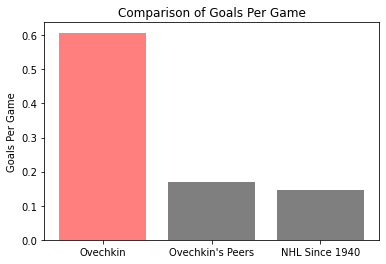

In [22]:
## Let's graph this difference

# Create variables
objects = ('Ovechkin', "Ovechkin's Peers", 'NHL Since 1940')
y_pos = np.arange(len(objects))
performance = [Ovechkin_career_GPG, Other_players_GPG, Ovechkin_peers_GPG]

# Create graph
plt.bar(y_pos, performance, align='center', color = ['red', 'black', 'black'], alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Goals Per Game')
plt.title('Comparison of Goals Per Game')

plt.show()

We see from the graph above that Ovechkin's goal scoring far exceeds that of both his peers and the historic average of NHL players. To determine why this might be, we will look at the shooting percentages of Ovechkin and his peers. We unfortunately cannot calculate the shooting percentages of all NHL players since 1940, as shots (and thus, shooting percentage) is a more recently tracked statistic.

In [23]:
## Let's compare Ovechkin's shooting percentage with his peers

Ovechkin_career_SP = Ovechkin_career['S%'].mean()
Ovechkin_peers_SP = Ovechkin_peers['S%'].mean()
SP_Difference = Ovechkin_career_SP - Ovechkin_peers_SP

print("Ovechkin's career shooting percentage:", Ovechkin_career_SP,'%')
print("Shooting percentage of Ovechkin's peers:", Ovechkin_peers_SP,'%')
print("Ovechkin vs Peers shooting percentage spread:", SP_Difference,'%')

Ovechkin's career shooting percentage: 12.692307692307692 %
Shooting percentage of Ovechkin's peers: 8.252167880679847 %
Ovechkin vs Peers shooting percentage spread: 4.440139811627844 %


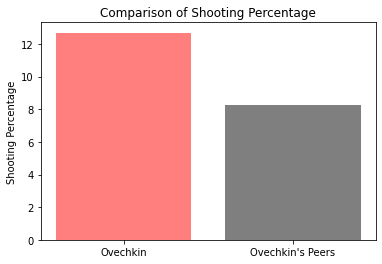

In [24]:
## Let's graph this difference

# Create variables
objects1 = ('Ovechkin', "Ovechkin's Peers")
y_pos1 = np.arange(len(objects1))
performance1 = [Ovechkin_career_SP, Ovechkin_peers_SP]

# Create graphs
plt.bar(y_pos1, performance1, align='center', color = ['red', 'black'], alpha=0.5)
plt.xticks(y_pos1, objects1)
plt.ylabel('Shooting Percentage')
plt.title('Comparison of Shooting Percentage')

plt.show()

We see that Ovechkin is far ahead of his peers in both goals per game and shooting percentage. But let's isolate this further. As explained earlier, not all players are expected to contribute to scoring. Generally speaking, players at forward positions (e.g. C, LW, RW) are expected to contribute to scoring far more than those playing defense.

We should explore how Ovechkin compares to other forwards. To do this, we will use the 'Pos Group' column.

In [25]:
## Check shooting percentage and goals per game of forwards

# Create subset of peers who played at a 'Forward' position
Ovechkin_peers_fwd = Ovechkin_peers[Ovechkin_peers['Pos Group'] == 'Forward']

# Find shooting percentage and goals per game
Peers_fwd_SP = Ovechkin_peers_fwd['S%'].mean()
Peers_fwd_GPG = Ovechkin_peers_fwd['GPG'].mean()
SP_Difference_fwd = Ovechkin_career_SP - Peers_fwd_SP
GPG_Difference_fwd = Ovechkin_career_GPG - Peers_fwd_GPG

# Compare
print("Ovechkin's career shooting percentage:", Ovechkin_career_SP,'%')
print("Shooting percentage of other forwards in Ovechkin's peer group:", Peers_fwd_SP,'%')
print("Ovechkin vs Peer Forwards shooting percentage spread:", SP_Difference_fwd,'%')
print("")
print("Ovechkin's goals per game:", Ovechkin_career_GPG)
print("Average goals per game of forwards since Ovechkin joined the NHL:", Peers_fwd_GPG)
print("Ovechkin vs Peer Forwards goals per game spread:", GPG_Difference_fwd, 'goals per game')

Ovechkin's career shooting percentage: 12.692307692307692 %
Shooting percentage of other forwards in Ovechkin's peer group: 10.148102163887904 %
Ovechkin vs Peer Forwards shooting percentage spread: 2.5442055284197878 %

Ovechkin's goals per game: 0.6076153846153847
Average goals per game of forwards since Ovechkin joined the NHL: 0.18822857396239798
Ovechkin vs Peer Forwards goals per game spread: 0.41938681065298666 goals per game


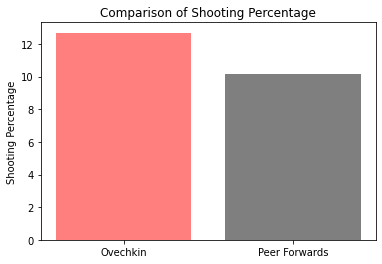

In [26]:
# Graph shooting percentage difference

# Create variables
objects2 = ('Ovechkin', 'Peer Forwards')
y_pos2 = np.arange(len(objects2))
performance2 = [Ovechkin_career_SP, Peers_fwd_SP]

# Create graph
plt.bar(y_pos2, performance2, align='center', color = ['red', 'black'], alpha=0.5)
plt.xticks(y_pos2, objects2)
plt.ylabel('Shooting Percentage')
plt.title('Comparison of Shooting Percentage')

plt.show()

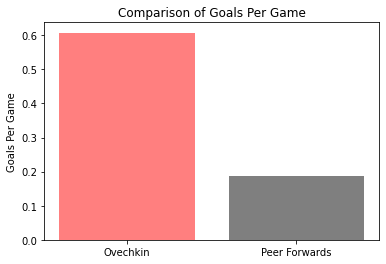

In [27]:
# Graph GPG difference

# Create variables
objects3 = ('Ovechkin', 'Peer Forwards')
y_pos3 = np.arange(len(objects3))
performance3 = [Ovechkin_career_GPG, Peers_fwd_GPG]

# Create graph
plt.bar(y_pos3, performance3, align='center', color = ['red', 'black'], alpha=0.5)
plt.xticks(y_pos3, objects3)
plt.ylabel('Goals Per Game')
plt.title('Comparison of Goals Per Game')

plt.show()

<b>We still see that Ovechkin is more accurate and provides more goal scoring than other forwards in the league. This should be expected of one of the NHL's superstars. To determine if Ovechkin really is one of the best, then we must compare his performance to other NHL superstars.</b>

To do this, we will create box plots to examine both goals per game (GPG) and shooting percentage (S%).

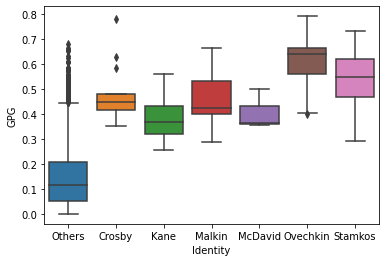

In [28]:
# create box plot comparing goals per game

sns.boxplot(x = Modern_players['Identity'], y = Modern_players['GPG'], data = Modern_players)

We see that Ovechkin has a higher goals per game than his superstar peers, which suggests that he is the best goal-scorer in the league. We should check to see if his shooting percentage is above his peers.

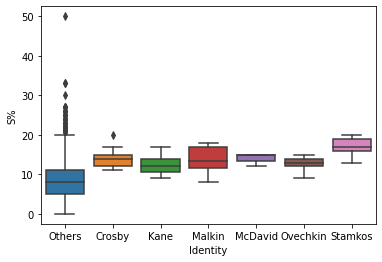

In [29]:
## Create box plot comparing shooting percentage

sns.boxplot(x = Modern_players['Identity'], y = Modern_players['S%'], data = Modern_players)

It's clear that Ovechkin's shooting percentage is in line with that of his superstar peers. It is not an outlier. If Ovechkin's goals per game is higher than others in the league, but his shooting percentage is not, we can deduce that Ovechkin must shoot the puck more often than his peers. Let's compare his shots.

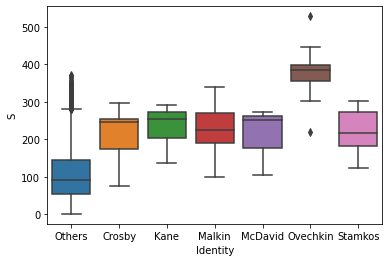

In [30]:
## Create box plot comparing total number of shots per season

sns.boxplot(x = Modern_players['Identity'], y = Modern_players['S'], data = Modern_players)

And here is what separates Ovechkin from everyone else in the NHL: he has an exceptional ability to shoot the puck at a rate far greater than other players, generating far more offense and goal-scoring.

# We see from the data and graphs above that Ovechkin is the best goal-scorer in the NHL.

## His goals per game is greater than that of his peers. He is an accurate shooter. We can deduce that this is not luck, as his shooting percentage is in line with other elite NHL athletes. Instead, we see that Ovechkin shoots the puck at an amazing rate, contributing to his best-in-the-league goals per game.